In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [2]:

m_df = pd.read_csv('Mtot_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'M']) 

print(m_df.head())


    time         M
0      0  0.000750
1  10000  0.000931
2  20000  0.001134
3  30000  0.001359
4  40000  0.001605


## EPS

In [3]:

eps_df = pd.read_csv('EPS_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'EPS']) 

print(eps_df.head())


    time       EPS
0      0  0.000500
1  10000  0.000528
2  20000  0.000560
3  30000  0.000597
4  40000  0.000639


## Merge

In [4]:
df = m_df.merge(eps_df, on='time')
df

,time,M,EPS
0,0,0.000750,0.000500
1,10000,0.000931,0.000528
2,20000,0.001134,0.000560
3,30000,0.001359,0.000597
4,40000,0.001605,0.000639
...,...,...,...
82,820000,0.003518,0.002884
83,830000,0.003525,0.002900
84,840000,0.003531,0.002916
85,850000,0.003537,0.002931


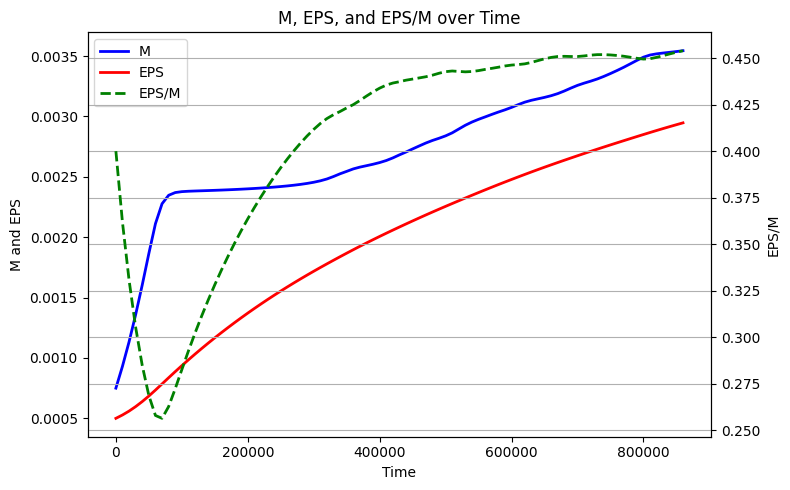

In [5]:
df['EPS_over_M'] = df['EPS'] / (df['M']+df['EPS'])

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(df['time'], df['M'], label='M', color='blue', linewidth=2)
ax1.plot(df['time'], df['EPS'], label='EPS', color='red', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('M and EPS', color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df['time'], df['EPS_over_M'], label='EPS/M', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('EPS/M')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('M, EPS, and EPS/M over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:

biomass_df = pd.read_csv('biomass.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


     time         B
0       0  0.002500
1   25000  0.005278
2   50000  0.006458
3   75000  0.008819
4  100000  0.008958


<AxesSubplot:xlabel='time'>

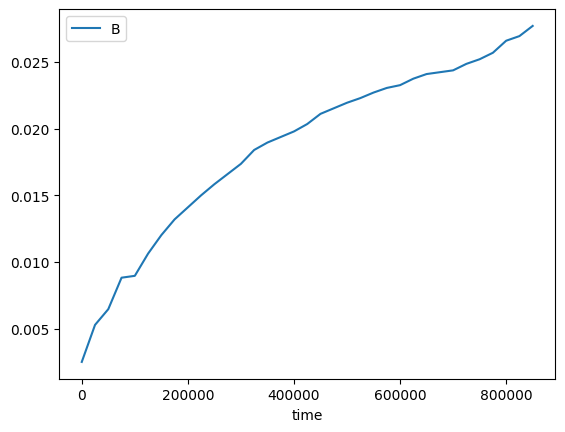

In [21]:
biomass_df.plot(x='time', y='B')